<a href="https://colab.research.google.com/github/ilkzeyden/call-center-customer-conversationsclustering-and-classification/blob/main/ak%C4%B1%C5%9F_i%C3%A7in_model_e%C4%9Fitimi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install datasets
!pip uninstall torch torchvision torchaudio
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install --upgrade transformers datasets
!pip cache purge

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 480.6/480.6 kB 9.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 179.3/179.3 kB 9.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 134.8/134.8 kB 5.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.1/194.1 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver doe

In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, TrainingArguments, Trainer



# 1. Excel'den verileri y√ºkle
file_path = r'/content/drive/My Drive/akƒ±≈ü-diyagramƒ±-√∂rnekleri-verileri.xlsx'
veriler = pd.read_excel(file_path)

# Giri≈ü ve √ßƒ±kƒ±≈ü verilerini ayƒ±kla
veriler['input_text'] = veriler['Akƒ±≈ü C√ºmlesi']  # Giri≈ü verisi
veriler['output_text'] = veriler.apply(
    lambda row: f"{row['Adƒ±m No']} {row['Adƒ±m A√ßƒ±klamasƒ±']} {row['Adƒ±m T√ºr√º']} {row['Ko≈üul (Varsa)']} {row['Evet Durumu (Sonraki Adƒ±m)']} {row['Hayƒ±r Durumu (Sonraki Adƒ±m)']}", axis=1
)

#veriler = veriler.rename(columns={"Akƒ±≈ü C√ºmlesi": "input_text", "√áƒ±kƒ±≈ü Verisi": "output_text"})
#veriler["output_text"] = veriler["output_text"].astype(str)  # √áƒ±kƒ±≈üƒ± metne d√∂n√º≈üt√ºr

veriler["Evet Durumu (Sonraki Adƒ±m)"] = veriler["Evet Durumu (Sonraki Adƒ±m)"].apply(lambda x: None if isinstance(x, str) and x.strip() == '-' else x)
veriler["Hayƒ±r Durumu (Sonraki Adƒ±m)"] = veriler["Evet Durumu (Sonraki Adƒ±m)"].apply(lambda x: None if isinstance(x, str) and x.strip() == '-' else x)

# Veri √∂nizleme
print("Veri √∂nizleme:", veriler.head())

# 2. Dataset formatƒ±na d√∂n√º≈üt√ºr
dataset = Dataset.from_pandas(veriler)

# 3. Model ve Tokenizer y√ºkle
model_name = "t5-small"  # K√º√ß√ºk bir model kullanƒ±yoruz
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


#tokenized_datasets = dataset.map(preprocess_function, batched=True)
# 4. Tokenizasyon i≈ülemi
def preprocess_function(examples):
    inputs = [str(x) for x in examples["input_text"]]  # Giri≈ü c√ºmleleri
    targets = [str(x) for x in examples["output_text"]]  # √áƒ±kƒ±≈ü detaylarƒ±
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding='max_length')
    labels = tokenizer(targets, max_length=512, truncation=True, padding='max_length').input_ids   # √áƒ±kƒ±≈ülar daha uzun olabilir
    model_inputs["labels"] = labels
    return model_inputs

tokenized_datasets = dataset.map(preprocess_function, batched=True)

# 5. Eƒüitim ayarlarƒ±
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
    save_steps=500,
    logging_dir="./logs"
)

from sklearn.model_selection import train_test_split

# Eƒüitim ve doƒürulama verilerini ayƒ±rma

train_dataset = tokenized_datasets.train_test_split(test_size=0.1, seed=42)["train"]
eval_dataset = tokenized_datasets.train_test_split(test_size=0.1, seed=42)["test"]

# 6. GPU kontrol√º ve modele aktarƒ±m
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Modeli GPU'ya ta≈üƒ±

# 6. Eƒüitici (Trainer) tanƒ±mlama
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,  # Doƒürulama veri k√ºmesini ekleyin
    tokenizer=tokenizer
)

# 6. Eƒüitici (Trainer) tanƒ±mlama
#trainer = Trainer(
 #   model=model,
 #   args=training_args,
 #   train_dataset=tokenized_datasets,
 #   tokenizer=tokenizer
#)

# 7. Modeli eƒüit
trainer.train()

# 8. Tahmin testi
def predict(cumle):
    inputs = tokenizer(cumle, return_tensors="pt", max_length=128, truncation=True)
    outputs = model.generate(**inputs, max_length=512)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test i√ßin √∂rnek bir c√ºmle
test_cumle = "Sipari≈ü bilgilerini al, stokta √ºr√ºn var mƒ± kontrol et, varsa sipari≈üi kaydet."
tahmin = predict(test_cumle)
print("Tahmin edilen adƒ±mlar ve t√ºrleri:", tahmin)


Veri √∂nizleme:    Akƒ±≈ü ID                                       Akƒ±≈ü C√ºmlesi  Adƒ±m No  \
0        1  "Sipari≈ü bilgilerini al, stokta √ºr√ºn var mƒ± ko...        1   
1        1  "Sipari≈ü bilgilerini al, stokta √ºr√ºn var mƒ± ko...        2   
2        1  "Sipari≈ü bilgilerini al, stokta √ºr√ºn var mƒ± ko...        3   
3        1  "Sipari≈ü bilgilerini al, stokta √ºr√ºn var mƒ± ko...        4   
4        1  "Sipari≈ü bilgilerini al, stokta √ºr√ºn var mƒ± ko...        5   

  Adƒ±m T√ºr√º                Adƒ±m A√ßƒ±klamasƒ± Ko≈üul (Varsa)  \
0     S√ºre√ß                Sistemi ba≈ülat.             -   
1     S√ºre√ß        Sipari≈ü bilgilerini al.             -   
2     Ko≈üul            Stokta √ºr√ºn var mƒ±?       Var mƒ±?   
3     S√ºre√ß    Sipari≈üi olu≈ütur ve kaydet.             -   
4     S√ºre√ß  "Stokta yok" mesajƒ±nƒ± g√∂ster.             -   

   Evet Durumu (Sonraki Adƒ±m)  Hayƒ±r Durumu (Sonraki Adƒ±m)  \
0                         2.0                          2.0 

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Map:   0%|          | 0/237 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-1-71f26dbcb0c9>:73: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: ilkay-deniz (joseph-agyeman-sakarya-niversitesi). Use `wandb login --relogin` to force relogin


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Tahmin edilen adƒ±mlar ve t√ºrleri: 


In [ ]:
#Kayƒ±plarƒ± izlemek i√ßin
# Eƒüitim ve doƒürulama kaybƒ±nƒ± kontrol et
logs = trainer.state.log_history  # Eƒüitim loglarƒ±nƒ± al
train_loss = [log['loss'] for log in logs if 'loss' in log]
eval_loss = [log['eval_loss'] for log in logs if 'eval_loss' in log]

print("Eƒüitim Kayƒ±plarƒ± (Train Loss):", train_loss)
print("Doƒürulama Kayƒ±plarƒ± (Eval Loss):", eval_loss)


Eƒüitim Kayƒ±plarƒ± (Train Loss): []
Doƒürulama Kayƒ±plarƒ± (Eval Loss): [4.021178722381592, 0.6953378319740295, 0.421870619058609]


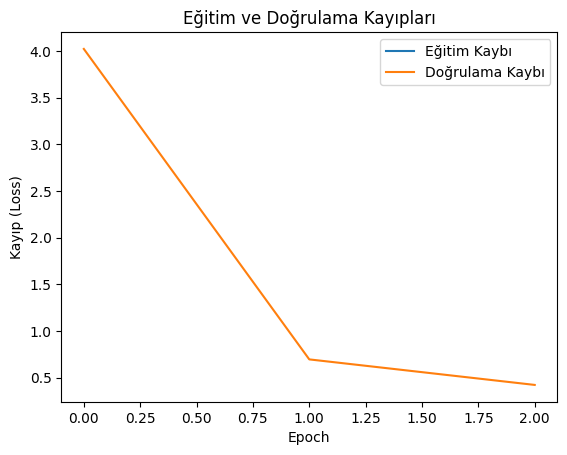

In [ ]:
#G√∂rsel analiz i√ßin
import matplotlib.pyplot as plt

# Kayƒ±plarƒ± √ßiz
plt.plot(train_loss, label="Eƒüitim Kaybƒ±")
plt.plot(eval_loss, label="Doƒürulama Kaybƒ±")
plt.xlabel("Epoch")
plt.ylabel("Kayƒ±p (Loss)")
plt.title("Eƒüitim ve Doƒürulama Kayƒ±plarƒ±")
plt.legend()
plt.show()
